In [1]:
%run ../MLHCExperiment-Common-Val17Test18.ipynb

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
all_visits = read_data()
all_visits = all_visits.where(all_visits["AdjCount"] > 0).dropna()

In [4]:
def run_one_month_ahead_rnn(filename, name, features, label):
    print(name)
    X = all_visits[features]
    y = all_visits[label]
    
    mses = list()
    
    start = time.time()
    predictions = list()

    features_min_max = preprocessing.MinMaxScaler()
    X_train, y_train, X_val, y_val, X_test, y_test = split_for_baseline_and_nn(X, y)

    X_train_t = reshape_for_rnn(features_min_max.fit_transform(X_train))
    X_val_t = reshape_for_rnn(features_min_max.transform(X_val))
    model = compile_rnn_weights_from_file(filename, X_train, 32, 32)

    for i in range(9):
        _, next_date, end_date = get_split_dates(i)
        if i == 0:
            model.fit(X_val_t, y_val.values, epochs=1, shuffle=False,
                                verbose=0)

        if i > 0:
            _, val_start, val_end = get_split_dates(i - 1)

            X_train_t = reshape_for_rnn(features_min_max.transform(X_test.loc[val_start:val_end]))
            model.fit(X_train_t, y_test.loc[val_start:val_end].values,
                      epochs=1, shuffle=False, verbose=0)

        X_test_t = reshape_for_rnn(features_min_max.transform(X_test.loc[next_date:end_date]))
        y_pred = model.predict(X_test_t, batch_size=1)
        predictions.extend(y_pred)

    mses.append(mean_squared_error(predictions, y_test))
    end = time.time()
    print("Trial completed in %.2f s" % (end - start))
    print("Average MSE so far: %.3f (%.3f)" % (np.mean(mses), np.std(mses)))
        
    y_pred = np.array(predictions).flatten()
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax.set(title=name, xlabel='Date', ylabel='Sick Visits Per FTE')
    all_visits.loc[TEST_START:, label].plot(ax=ax, color='gray', style='.', label='actual sick visits/fte')
    plt.scatter(all_visits.loc[TEST_START:].index, y_pred, color='r',label='predicted sick visits/fte')
    plt.legend()
    return mses, y_pred

RNNModels/32-32Best/Dynamic-RNN-AllVisits-32-32-Trial0-1562316203.5722883.h5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Trial completed in 10.52 s
Average MSE so far: 1.044 (0.000)
RNNModels/32-32Best/Dynamic-RNN-AllVisits-32-32-Trial2-1562318933.3989708.h5
Trial completed in 10.98 s
Average MSE so far: 1.024 (0.000)
RNNModels/32-32Best/Dynamic-RNN-AllVisits-32-32-Trial4-1562322144.5695276.h5
Trial completed in 12.18 s
Average MSE so far: 1.018 (0.000)
RNNModels/32-32Best/Dynamic-RNN-AllVisits-32-32-Trial3-1562320836.649595.h5
Trial completed in 14.53 s
Average MSE so far: 1.038 (0.000)
RNNModels/32-32Best/Dynamic-RNN-AllVisits-32-32-Trial1-1562317741.1352634.h5
Trial completed in 16.87 s
Average MSE so far: 1.020 (0.000)
MSE and RMSE over 10 trials with standard deviation in parentheses
Average MSE: 1.029 (0.010)
Average RMSE: 1.014 (0.005)


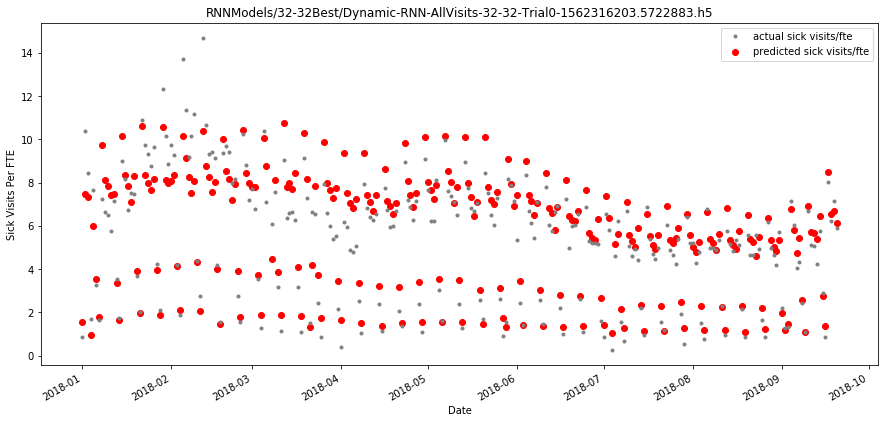

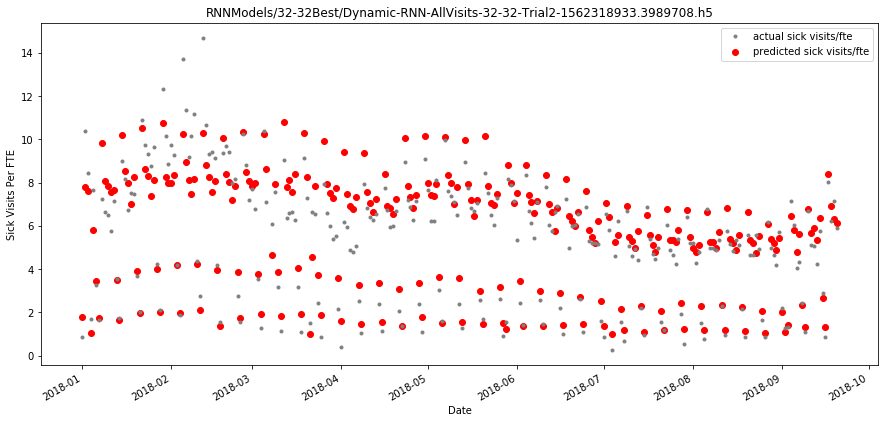

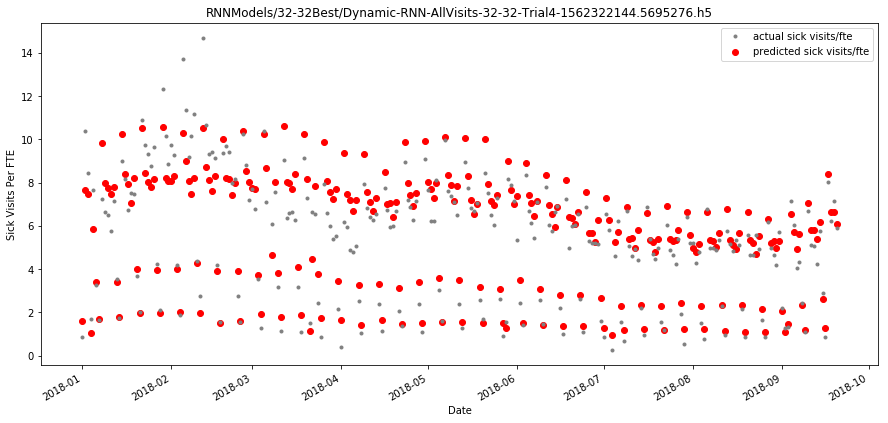

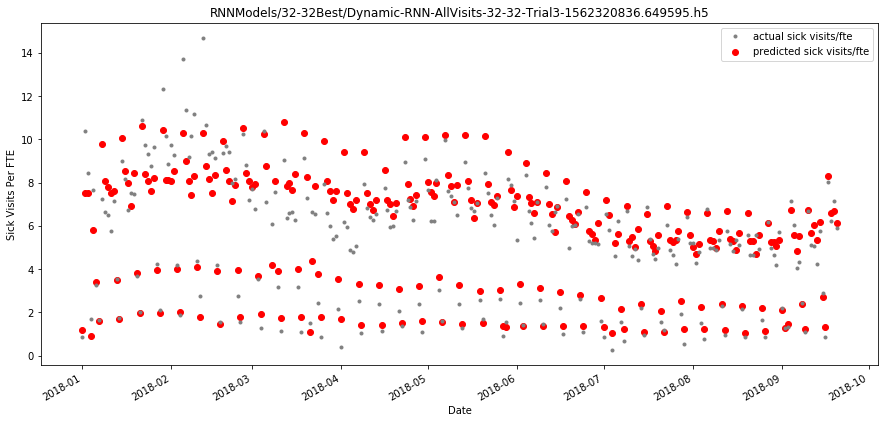

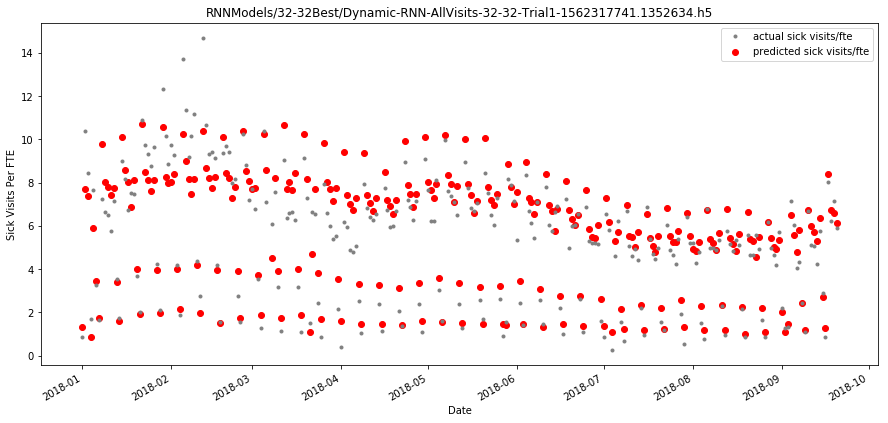

In [5]:
filenames = prebuilt_rnn_models["32-32"]

mses = list()

for filename in filenames:
    mse, _ = run_one_month_ahead_rnn("../" + filename, filename, BASE_FEATURES, ALL_VISITS_LABEL)
    mses.append(mse)

print_mse_metrics(mses)

RNNModels/32-32Resp/Dynamic-RNN-RespVisits-32-32-Trial4-1562366029.9926655.h5
Trial completed in 19.32 s
Average MSE so far: 0.439 (0.000)
RNNModels/32-32Resp/Dynamic-RNN-RespVisits-32-32-Trial0-1562364481.482371.h5
Trial completed in 17.72 s
Average MSE so far: 0.438 (0.000)
RNNModels/32-32Resp/Dynamic-RNN-RespVisits-32-32-Trial2-1562365257.6494977.h5
Trial completed in 20.07 s
Average MSE so far: 0.432 (0.000)
RNNModels/32-32Resp/Dynamic-RNN-RespVisits-32-32-Trial3-1562365645.8746376.h5
Trial completed in 22.36 s
Average MSE so far: 0.433 (0.000)
RNNModels/32-32Resp/Dynamic-RNN-RespVisits-32-32-Trial1-1562364882.4930165.h5
Trial completed in 23.26 s
Average MSE so far: 0.436 (0.000)
MSE and RMSE over 10 trials with standard deviation in parentheses
Average MSE: 0.436 (0.003)
Average RMSE: 0.660 (0.002)


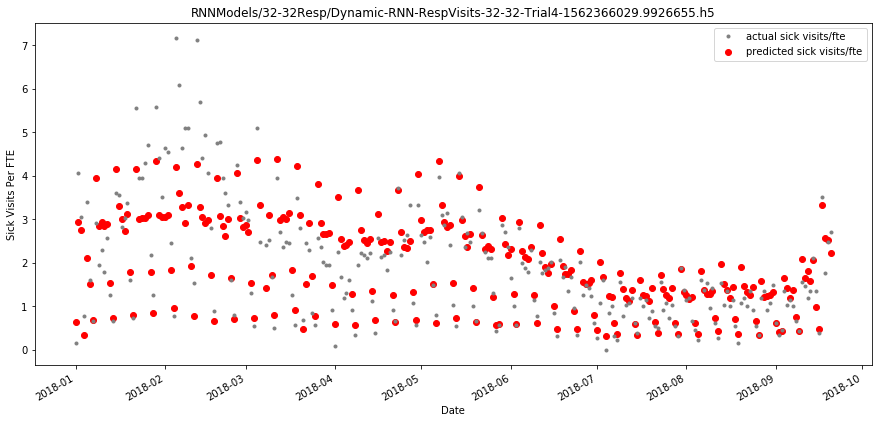

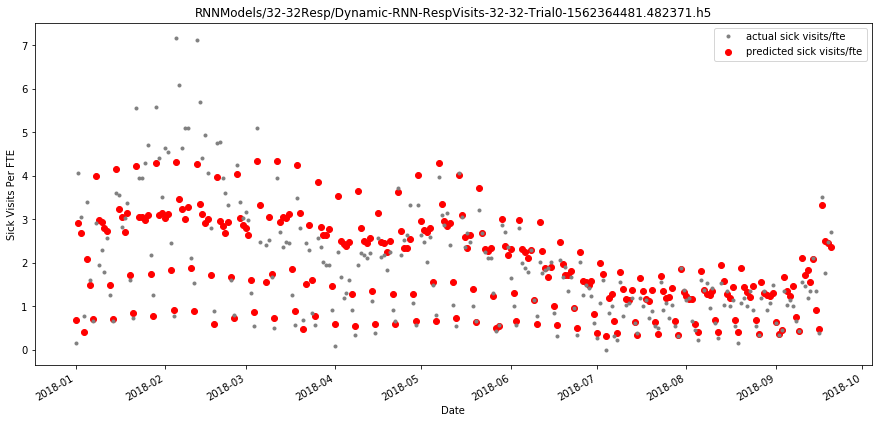

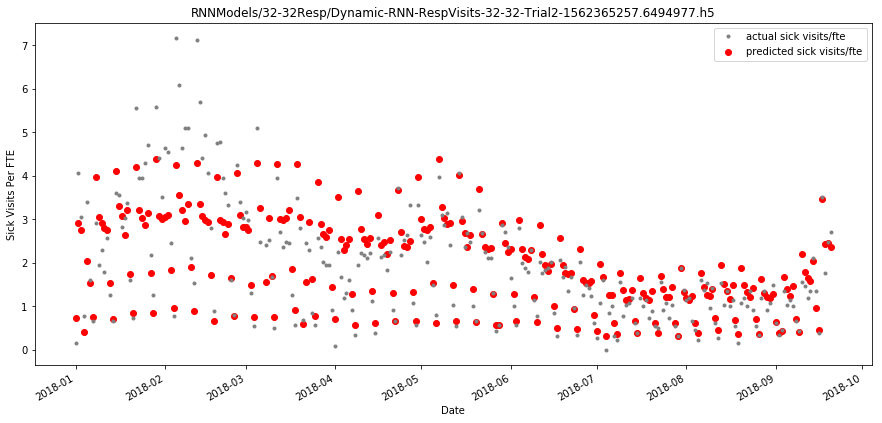

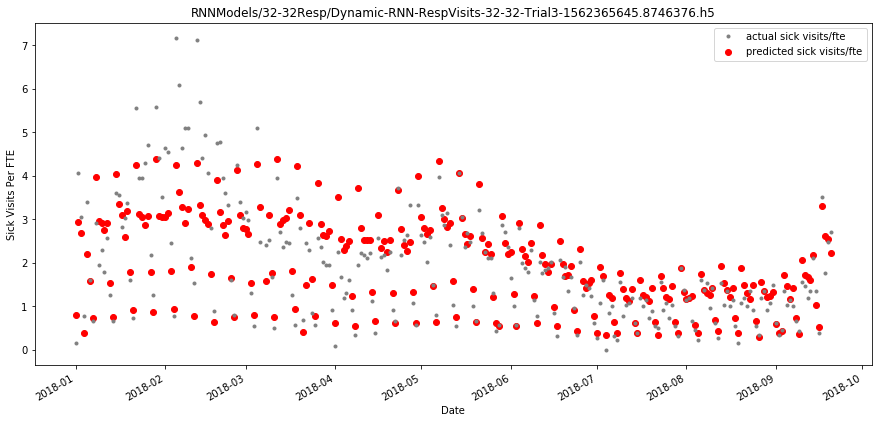

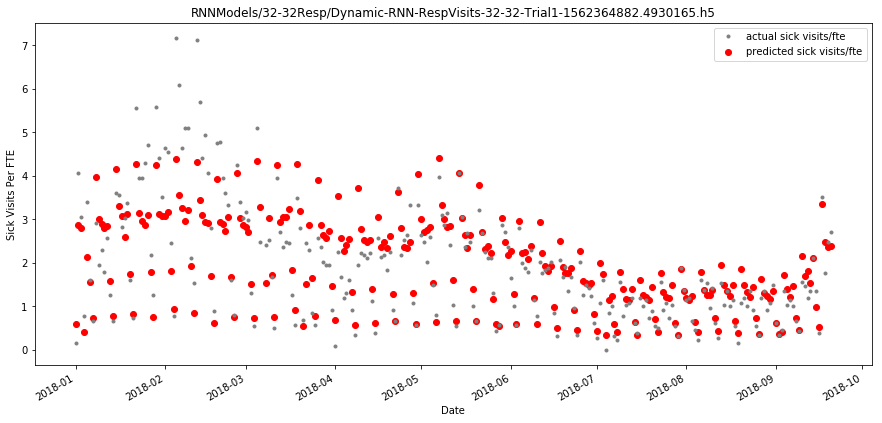

In [6]:
filenames_r = prebuilt_rnn_models["32-32R"]

mses_r = list()

for filename in filenames_r:
    mse, _ = run_one_month_ahead_rnn("../" + filename, filename, BASE_FEATURES, ICD8_LABEL)
    mses_r.append(mse)

print_mse_metrics(mses_r)

RNNModels/32-32NonResp/Dynamic-RNN-NonRespVisits-32-32-Trial3-1562367965.7343554.h5
Trial completed in 26.76 s
Average MSE so far: 0.429 (0.000)
RNNModels/32-32NonResp/Dynamic-RNN-NonRespVisits-32-32-Trial2-1562367439.946335.h5
Trial completed in 29.32 s
Average MSE so far: 0.432 (0.000)
RNNModels/32-32NonResp/Dynamic-RNN-NonRespVisits-32-32-Trial0-1562366476.9159904.h5
Trial completed in 30.74 s
Average MSE so far: 0.420 (0.000)
RNNModels/32-32NonResp/Dynamic-RNN-NonRespVisits-32-32-Trial4-1562368359.5355737.h5
Trial completed in 30.10 s
Average MSE so far: 0.431 (0.000)
RNNModels/32-32NonResp/Dynamic-RNN-NonRespVisits-32-32-Trial1-1562366886.6321354.h5
Trial completed in 31.52 s
Average MSE so far: 0.414 (0.000)
MSE and RMSE over 10 trials with standard deviation in parentheses
Average MSE: 0.425 (0.007)
Average RMSE: 0.652 (0.006)


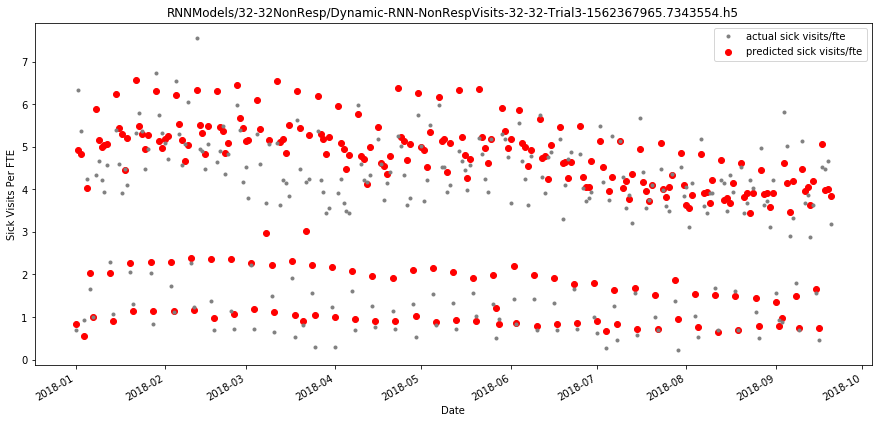

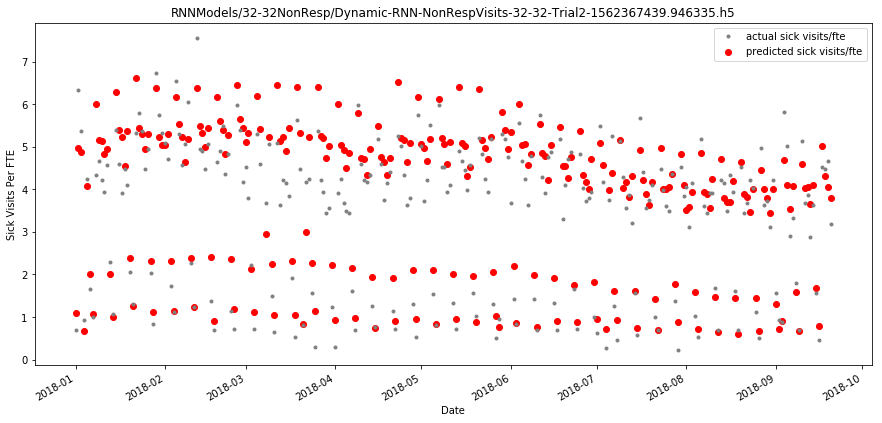

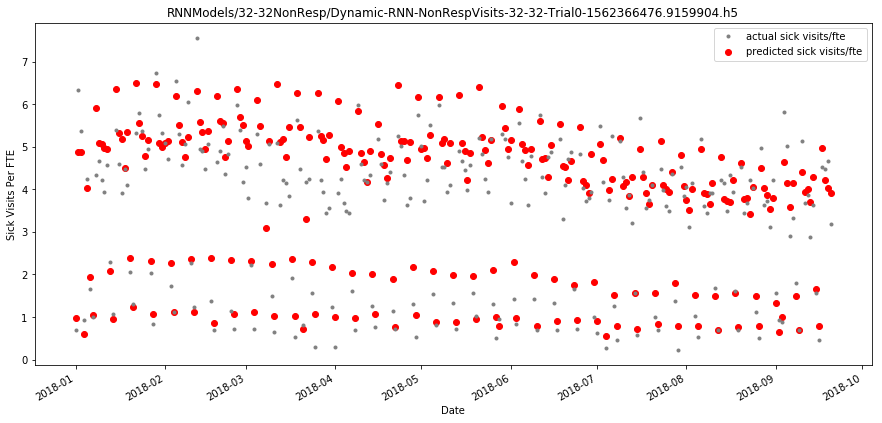

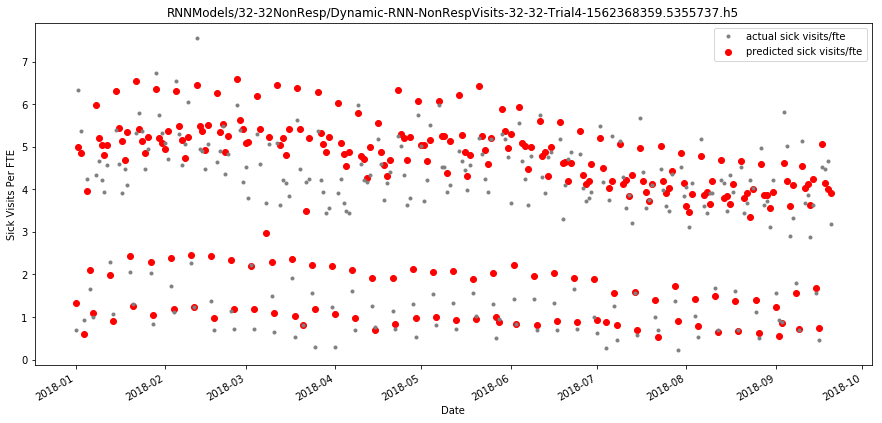

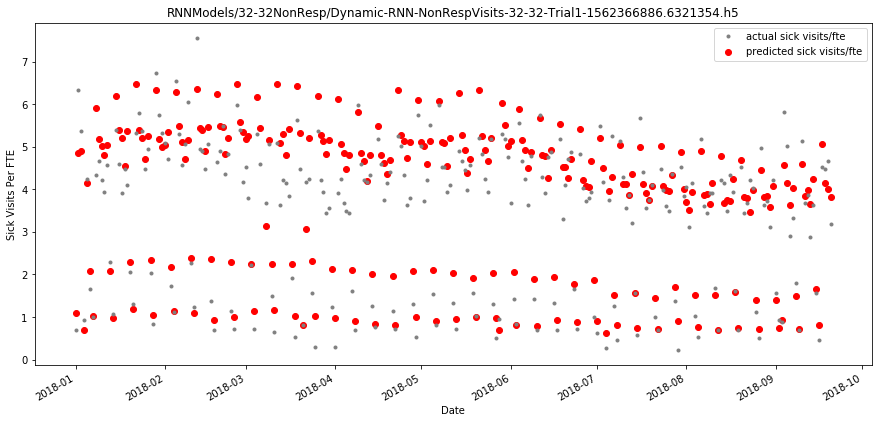

In [7]:
filenames_nr = prebuilt_rnn_models["32-32NR"]

mses_nr = list()

for filename in filenames_nr:
    mse, _ = run_one_month_ahead_rnn("../" + filename, filename, BASE_FEATURES, ICD8OPP_LABEL)
    mses_nr.append(mse)

print_mse_metrics(mses_nr)